# LINEAR REGRESSION
Importing Liberaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

In [3]:
#Load dataset
data = pd.read_csv('advertising.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Looking into Dataset

In [49]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [50]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [51]:
data.shape

(200, 4)

In [52]:
a=data.describe()
print(a)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [53]:
type(a)

pandas.core.frame.DataFrame

In [54]:
b=a.get("TV")
type(b)

pandas.core.series.Series

In [55]:
b.get('mean')

147.0425

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [57]:
#sns.pairplot??

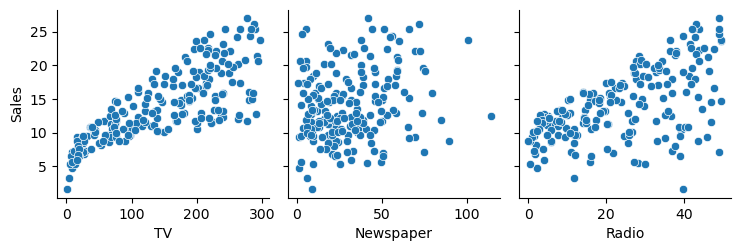

In [58]:
#scatter plots of each column (X) against sales (Y) using Seaborn
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

In [59]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


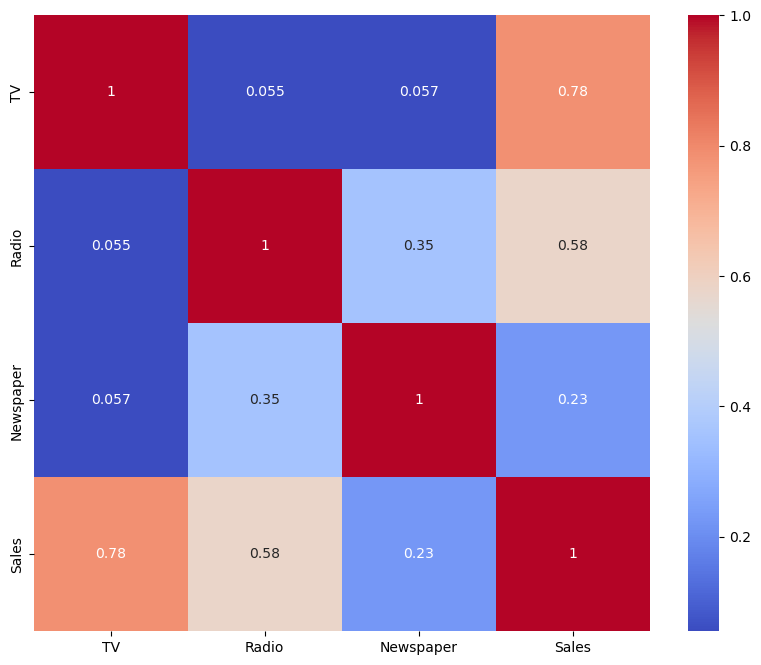

In [60]:
#correlation between different colomns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
#plt.title('Correlation Matrix Heatmap')
plt.show()

# Dataset Preparation for the linear regression modeling

In [61]:
X=data['TV'].values.reshape(-1,1)
Y=data['Sales'].values.reshape(-1,1)

In [34]:
type(X)

numpy.ndarray

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=100)

In [36]:
X_train.shape

(140, 1)

# Training

In [37]:
#create a Linear Regression model
model=LinearRegression()

In [38]:
#Fit the model to the training data (model is being trained here...)
model.fit(X_train, y_train)

LinearRegression()

# Prediction

In [39]:
#Make predictions on the test set
y_pred=model.predict(X_test)

# Evaluation

In [40]:
#Evaluating the model (Evaluation metrics MSE, R-Squared, SSE etc...)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [43]:
print("Mean Squared Error", mse)
print("R^2 Score", r2)

Mean Squared Error 7.97579853285485
R^2 Score 0.5942987267783302


# Plotting

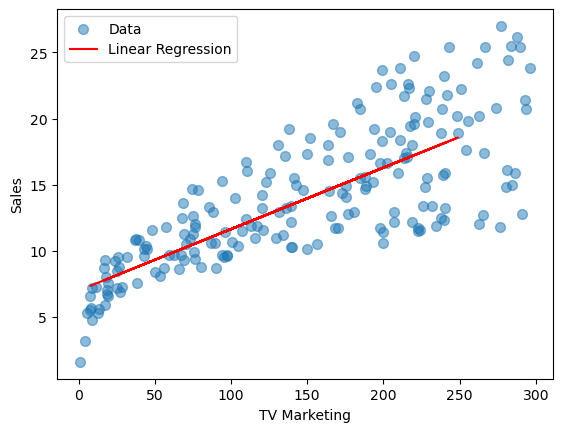

In [42]:
#Visualize the data and the linear regression line
plt.scatter(X, Y, s=50, alpha=0.5, label='Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.xlabel('TV Marketing')
plt.ylabel('Sales')
plt.legend()
plt.show()